In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

Data


In [11]:
df = pd.read_csv('Heart_Disease_Prediction.csv')


In [13]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [15]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [17]:
df.shape


(270, 14)

checking for missing values

In [19]:
df.isnull().values.any()

False

Checking for imbalanced data based on sex.

In [21]:
df['Sex'].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

Checking for imbalanced data based on outcome.

In [23]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

<Axes: xlabel='Heart Disease', ylabel='count'>

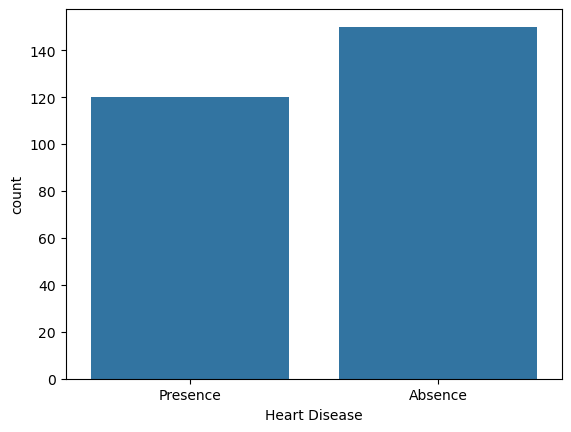

In [25]:
sns.countplot(x='Heart Disease', data=df)

Checking for any correlation

In [27]:
print(df.dtypes)


Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object


In [29]:
numeric_df = df.select_dtypes(include=['number'])  
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                              Age       Sex  Chest pain type        BP  \
Age                      1.000000 -0.094401         0.096920  0.273053   
Sex                     -0.094401  1.000000         0.034636 -0.062693   
Chest pain type          0.096920  0.034636         1.000000 -0.043196   
BP                       0.273053 -0.062693        -0.043196  1.000000   
Cholesterol              0.220056 -0.201647         0.090465  0.173019   
FBS over 120             0.123458  0.042140        -0.098537  0.155681   
EKG results              0.128171  0.039253         0.074325  0.116157   
Max HR                  -0.402215 -0.076101        -0.317682 -0.039136   
Exercise angina          0.098297  0.180022         0.353160  0.082793   
ST depression            0.194234  0.097412         0.167244  0.222800   
Slope of ST              0.159774  0.050545         0.136900  0.142472   
Number of vessels fluro  0.356081  0.086830         0.225890  0.085697   
Thallium                 0.106100  0.3

K-Nearest Neighbours

In [31]:
#Splitting the dataset into training and testing sets.
x = df.iloc[:, :-2]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.35)

In [33]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [35]:
math.sqrt(len(y_test))


9.746794344808963

In [37]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [39]:
y_pred = classifier.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Ab

In [41]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[43 12]
 [11 29]]


In [43]:
print(accuracy_score(y_test,y_pred))

0.7578947368421053


SVM MODEL

In [46]:
# Creating SVM model.
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [48]:
y_pred = clf.predict(x_test)
y_pred

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absence', 'Absen

In [50]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[44 11]
 [11 29]]


In [52]:
print(accuracy_score(y_test,y_pred))

0.7684210526315789
